# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import show
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Import Dataset

In [2]:
df_catalysis_dataset = pd.read_csv("../data/OCM-data.csv", index_col=0, header=0)
df_catalysis_dataset.dtypes

M1                    object
M1_atom_number         int64
M2                    object
M2_atom_number         int64
M3                    object
M3_atom_number         int64
Support               object
Support_ID             int64
M2_mol               float64
M3_mol               float64
M1_mol_percentage      int64
M2_mol_percentage      int64
M3_mol_percentage      int64
Temp                   int64
Total_flow             int64
Ar_flow              float64
CH4_flow             float64
O2_flow              float64
CT                   float64
CH4/O2                 int64
CH4_conv             float64
C2y                  float64
C2H6y                float64
C2H4y                float64
COy                  float64
CO2y                 float64
C2s                  float64
C2H6s                float64
C2H4s                float64
COs                  float64
CO2s                 float64
dtype: object

# Define Variables

In [19]:
x = df_catalysis_dataset[["Ar_flow", "CH4_flow", "O2_flow", "CT", "M2_mol", "M3_mol"]]
print(x)

              Ar_flow  CH4_flow  O2_flow    CT  M2_mol  M3_mol
Name                                                          
Mn-Na2WO4/BN      1.5       5.7      2.8  0.75    0.37   0.185
Mn-Na2WO4/BN      2.3       8.5      4.3  0.50    0.37   0.185
Mn-Na2WO4/BN      3.0      11.3      5.7  0.38    0.37   0.185
Mn-Na2WO4/BN      1.5       6.4      2.1  0.75    0.37   0.185
Mn-Na2WO4/BN      2.3       9.6      3.2  0.50    0.37   0.185
...               ...       ...      ...   ...     ...     ...
Na/SiO2          10.5       3.6      0.9  0.50    0.37   0.000
Na/SiO2          14.0       4.8      1.2  0.38    0.37   0.000
Na/SiO2           7.0       2.6      0.4  0.75    0.37   0.000
Na/SiO2          10.5       3.9      0.6  0.50    0.37   0.000
Na/SiO2          14.0       5.1      0.9  0.38    0.37   0.000

[12708 rows x 6 columns]


In [26]:
# CH4_conv, C2y, COy
df_catalysis_dataset['classifier'] = np.where(df_catalysis_dataset['C2s']>=50.0, True, False)
y = df_catalysis_dataset["classifier"]
print(y)

Name
Mn-Na2WO4/BN    False
Mn-Na2WO4/BN    False
Mn-Na2WO4/BN    False
Mn-Na2WO4/BN    False
Mn-Na2WO4/BN    False
                ...  
Na/SiO2         False
Na/SiO2         False
Na/SiO2         False
Na/SiO2         False
Na/SiO2         False
Name: classifier, Length: 12708, dtype: bool


# Split the dataset into training and test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
y_test.value_counts()

False    1842
True      700
Name: classifier, dtype: int64

# Train the model on training set

In [14]:
#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

# Predict

In [15]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[False False False ... False False False]


# Evaluate

Text(0.5, 1.0, 'ch4 vs temp')

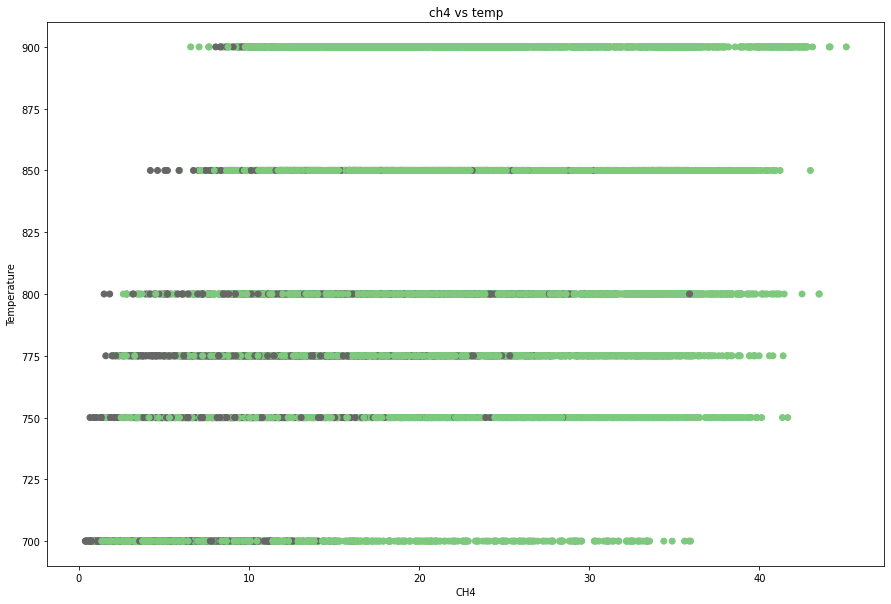

In [16]:
plt.figure(figsize=(15, 10))
plt.scatter(df_catalysis_dataset["CH4_conv"], df_catalysis_dataset["Temp"],c = df_catalysis_dataset["classifier"], cmap = 'Accent')
plt.xlabel("CH4")
plt.ylabel("Temperature")
plt.title("ch4 vs temp")

# HyperPlane

In [17]:
# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

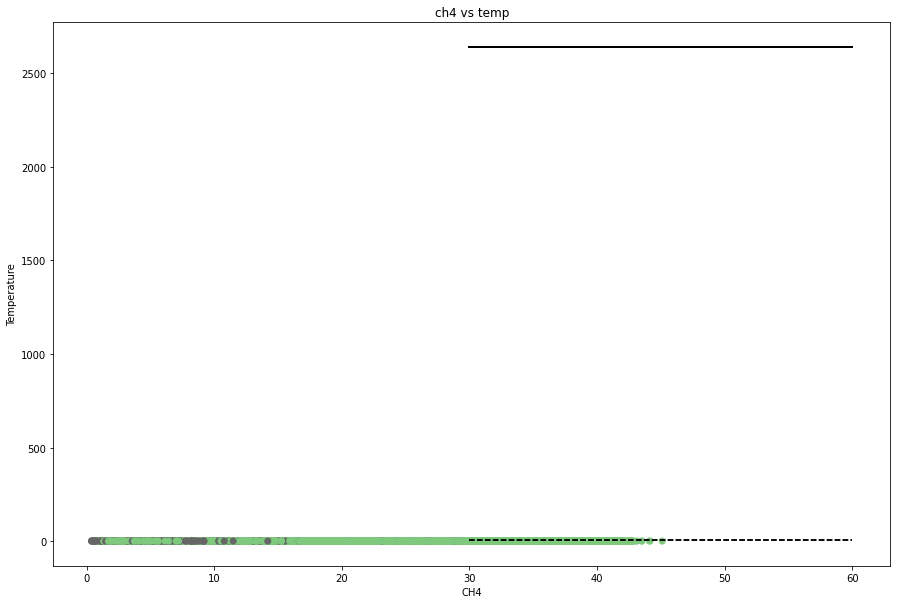

In [18]:
plt.figure(figsize=(15, 10))
plt.scatter(df_catalysis_dataset["CH4_conv"], df_catalysis_dataset["CT"],c = df_catalysis_dataset["classifier"], cmap = 'Accent')
plt.xlabel("CH4")
plt.ylabel("Temperature")
plt.title("ch4 vs temp")
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none');